In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [4]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'No of x_train sample: {x_train.shape[0]}')
print(f'No of y_train sample: {y_train.shape[0]}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
No of x_train sample: 50000
No of y_train sample: 50000


In [5]:
print(type(x_train)) 

<class 'numpy.ndarray'>


In [6]:
df = pd.DataFrame(y_train, columns=['classes'])
df.value_counts()

classes
0          5000
1          5000
2          5000
3          5000
4          5000
5          5000
6          5000
7          5000
8          5000
9          5000
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Samples per Class Distribution')

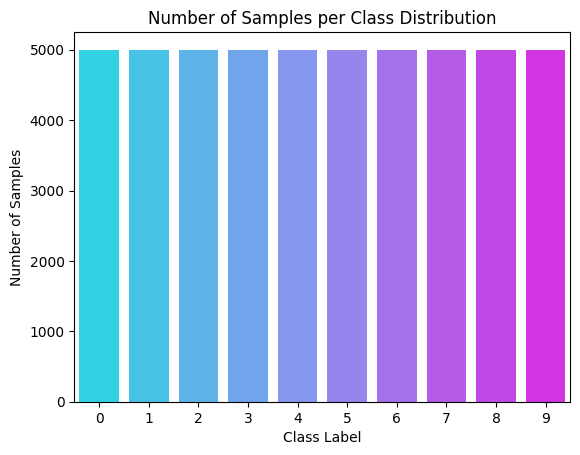

In [7]:
fig, axs = plt.subplots()
sns.countplot(x = 'classes', data = df, palette='cool')
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Number of Samples per Class Distribution")

In [8]:
df = pd.DataFrame(y_test, columns=['classes'])
print(df.value_counts())

classes
0          1000
1          1000
2          1000
3          1000
4          1000
5          1000
6          1000
7          1000
8          1000
9          1000
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of Samples per Class Distribution')

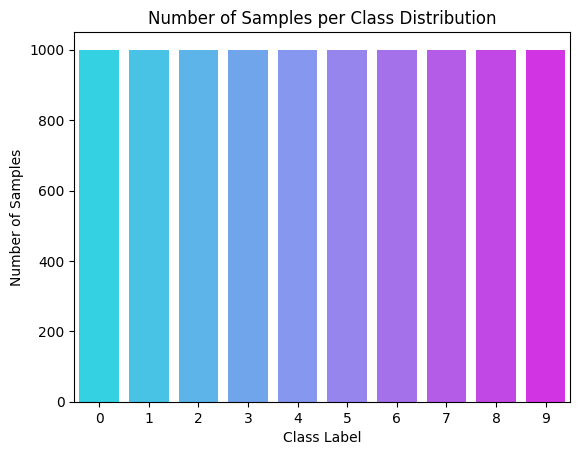

In [9]:
fig, axs = plt.subplots()
sns.countplot(x = 'classes', data = df, palette='cool')
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Number of Samples per Class Distribution")

As we can see, each classe contain exacly 6000 examples( 5000 for training and 1000 for test).

The graph above shows us that data is balanced and for example if we had just 1000 samples of label 1 that will be a problem , the model will find difficulties to detect label 1"less accuracy ", so that's not going to happend everything look fine. It's important to know the distribution of dataset behind different classes because the goodness of our model depend on it.

Now let's doing some preprocessing.

The output variable have 10 posible values. This is a multiclass classification problem. We need to encode these lables to one hot vectors (ex : "bird" -> [0,0,1,0,0,0,0,0,0,0]).As we can see, each classe contain exacly 6000 examples( 5000 for training and 1000 for test).

# Normalizing
We have to normalize the data in order to reduce the pixel values. Currently, all the image pixels are in a range from 0–255, and we want the values in the range of 0 and 1. So we can either divide all the pixel values by 255.0 or use the ‘normalize’ command from keras library.

**key benefits of normalizing:**

1. Improved Model Convergence:
2. Fairer Treatment of Features:
3. Enhanced Interpretability:
4. Optimized Algorithm Performance:
5. Reduced Risk of Vanishing:

In [10]:
# before scaling
print(x_train[0].shape)
print(x_train[0])

(32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
# after scaling
print(x_train[0].shape)

(32, 32, 3)


# Activation function

Befor using ANN first try to learn what is activation function
**Activation function**
The activation function can be defined as a mathematical function that introduces non-linearity to the neural network. This enables the models to learn complex patterns and helps them make accurate predictions.

In simple words, think of it like a switch, that decides whether a neuron should be activated or not. If the input is above a certain threshold or meets certain criteria, the neuron will activate/fire, or else it remains inactive.

for more better understanding please refer this article --link text
we have many activation function
1. Step Function:
2. Sigmoid Function: 
3. ReLU:

**ReLu:**
ReLU is the most popular and commonly used activation function. It outputs the input value if it is positive or returns zero. It has advantage over sigmoid and tanh

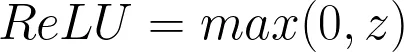

ReLU is majorly used in the hidden layers of the neural network since it brings sparsity to the data.
1. Non-linearity:
2. Computationally Efficient:
3. No Vanishing Gradient Problem:

**Defining the model architecture Using ConVnets**
Now Let us define a suitable deep net.

In the first stage, Our net will learn **32** convolutional filters, each of which with a** 3 x 3 size**. The output dimension is the same one of the input shape, so it will be **32 x 32** and activation is relu, which is a simple way of introducing non-linearity; folowed by another 32 convolutional filters, each of which with a 3 x 3 size and activation is also relu. After that we have a max-pooling operation with pool size **2 x 2** and a dropout at 25%.
In the next stage in the deep pipeline, Our net will learn 64 convolutional filters, each of which with a **3 x 3** size. The output dimension is the same one of the input shape and activation is relu; folowed by another **64 convolutional filters**, each of which with a 3 x 3 size and activation is also relu. After that we have a max-pooling operation with pool size 2 x 2 and a dropout at 25%.
And the Final stage in the deep pipeline is a dense network with **512** units and relu activation followed by a dropout at 50% and by a softmax layer with **10 classes** as output, one for each category.
Now let us look at the code review for our architecture.

In [15]:
#define the convnet
cnn_classifier = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
cnn_classifier.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
cnn_classifier.add(Activation('relu'))
cnn_classifier.add(Conv2D(32, (3, 3)))
cnn_classifier.add(Activation('relu'))
cnn_classifier.add(MaxPooling2D(pool_size=(2, 2)))
cnn_classifier.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
cnn_classifier.add(Conv2D(64, (3, 3), padding='same'))
cnn_classifier.add(Activation('relu'))
cnn_classifier.add(Conv2D(64, (3, 3)))
cnn_classifier.add(Activation('relu'))
cnn_classifier.add(MaxPooling2D(pool_size=(2, 2)))
cnn_classifier.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
cnn_classifier.add(Flatten())
cnn_classifier.add(Dense(512))
cnn_classifier.add(Activation('relu'))
cnn_classifier.add(Dropout(0.5))
# a softmax classifier
cnn_classifier.add(Dense(10))
cnn_classifier.add(Activation('softmax'))

cnn_classifier.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

# Optimization
The optimization algorithm is called “**gradient descent**“, where “gradient” refers to the calculation of an error gradient or **slope of error** and “descent” refers to the moving down along that **slope towards some minimum** level of error.

In [16]:

# compile the neural network

# compilation is a step that transforms the simple sequence of layers
# that we previously defined into a highly efficient series of matrix transformations

# Optimizer it helps in reducing the overall loss and improving accuracy.

# Adam optimization is a stochastic gradient descent method that is based on
# adaptive estimation of first-order and second-order moments.

# sparse_categarical_cross. when each sample belongs exactly to one
# categorical crossentropy when one sample can have multiple classes or labels are

# soft probabilities (like [0.5, 0.3, 0.2]).

cnn_classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Epoch
The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
The number of epochs can be set to an integer value between **one and infinity**. You can run the algorithm for as long as you like and even stop it using other criteria besides a fixed number of epochs just like here i have use fixed number of **epochs equeal to 50** as well as other stoping criteria that is **Early stopping**

# Batch
The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

**1<= batch size <= number of samples in the training dataset.**

Think of a batch as a for-loop iterating over one or more samples and making predictions. At the end of the batch, the predictions are compared to the expected output variables and an error is calculated. From this error, the update algorithm is used to improve the model, e.g. move down along the error gradient.

**Depending upon size of batch we divide it into 3 category**
1. **Batch Gradient Descent**. Batch Size = Size of Training Set
2. **Stochastic Gradient Descent**. Batch Size = 1
3. **Mini-Batch Gradient Descent**. 1 < Batch Size < Size of Training Set

In [19]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# training the neural network
# validation_split is Fraction of the training data to be used as validation data
# Epoch is the total number of iterations of the training data in one cycle
history = cnn_classifier.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=64, callbacks=[early_stopping])

Epoch 1/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 102s 142ms/step - accuracy: 0.3293 - loss: 1.8014 - val_accuracy: 0.5790 - val_loss: 1.1794
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 96s 137ms/step - accuracy: 0.5760 - loss: 1.1934 - val_accuracy: 0.6644 - val_loss: 0.9558
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 141s 136ms/step - accuracy: 0.6515 - loss: 0.9860 - val_accuracy: 0.7176 - val_loss: 0.7948
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 96s 136ms/step - accuracy: 0.6918 - loss: 0.8735 - val_accuracy: 0.7494 - val_loss: 0.7385
Epoch 5/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 101s 143ms/step - accuracy: 0.7208 - loss: 0.7942 - val_accuracy: 0.7580 - val_loss: 0.7115
Epoch 6/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 95s 135ms/step - accuracy: 0.7421 - loss: 0.7323 - val_accuracy: 0.7704 - val_loss: 0.6812
Epoch 7/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 142s 136ms/step - accuracy: 0.7584 - loss: 0.6963 - val_accuracy: 0.7740 - val_loss: 0.6508
Epoch 8/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 143s 137ms/step - accuracy: 0.7

**We got accuracy of 87.62% with training dataset and 80.34 with validation dataset**
which is quit good, Now will see using transfer learning in next notebook.

Now we can save our trained model, since it takes lots of resuources to train our model everytime so we can save and later we load and use it directly.

In [20]:
cnn_classifier.save('cnn_classifier.h5')

In [21]:
loss, accuracy = cnn_classifier.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8009 - loss: 0.6482
Test Accuracy = 0.7962999939918518


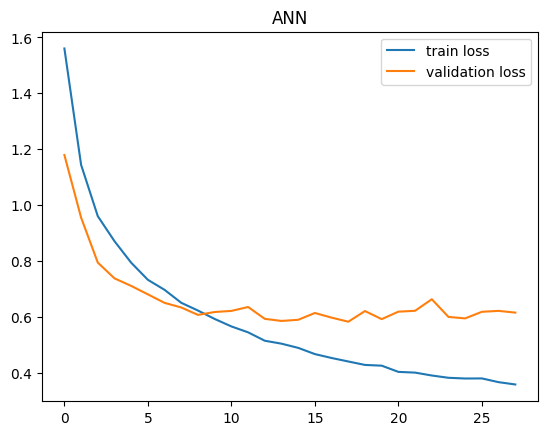

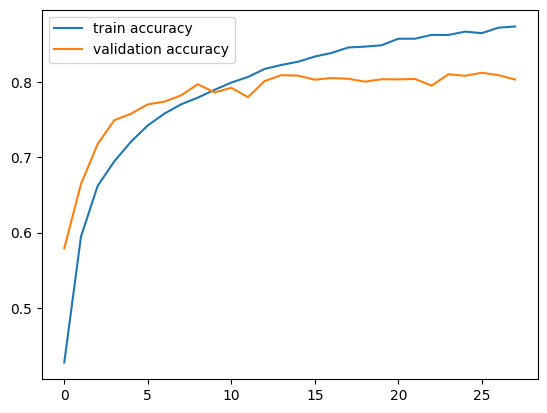

In [22]:
h = history
plt.title('ANN')
# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()

plt.show()